# Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import plotly
import seaborn as srn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

### Análise Exploratória

In [3]:
df_risco_credito = pd.read_csv('risco_credito.csv')
print(df_risco_credito.shape)
df_risco_credito.head()

(14, 5)


,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [4]:
df_risco_credito.describe(include='all')

,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,boa,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


In [5]:
df_risco_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### Pré-processamento

In [9]:
X_risco = df_risco_credito.iloc[:, 0:4].values
print(X_risco.shape)
X_risco

(14, 4)


array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [10]:
y_risco = df_risco_credito.iloc[:, 4].values
print(y_risco.shape)
y_risco

(14,)


array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [11]:
# Para realizar o Label Encoder de datdos categóricos
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [14]:
X_risco[:, 0] = label_encoder_historia.fit_transform(X_risco[:, 0])
X_risco[:, 1] = label_encoder_divida.fit_transform(X_risco[:, 1])
X_risco[:, 2] = label_encoder_garantia.fit_transform(X_risco[:, 2])
X_risco[:, 3] = label_encoder_renda.fit_transform(X_risco[:, 3])

In [15]:
X_risco

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [17]:
# Salvando opré-processamento num arquivo
import pickle
with open("risco_credito.pkl", 'wb') as f:
    pickle.dump([X_risco, y_risco], f)

### Implementação do Naive Bayes

In [21]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco, y_risco)

GaussianNB()

Previsão de:
- História: Boa (0)
- Dívida: Alta (0)
- Garantias: Nenhuma (1)
- Renda > 35 (2)

    Risco esperado: baixo

Para correção laplaciana:
- História: Ruim (2)
- Dívida: Alta (0)
- Garantias: Adequada (0)
- Renda < 15 (0)
 
 Risco esperado: moderado

In [22]:
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [23]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [24]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [25]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base credit data

In [28]:
df_credit = pd.read_csv('../Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data.csv')
print(df_credit.shape)
df_credit.head()

(2000, 5)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Pré-processamento

In [29]:
with open('credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

In [32]:
print(X_credit_train.shape, y_credit_train.shape)
print(X_credit_test.shape, y_credit_test.shape)

(1500, 3) (1500,)
(500, 3) (500,)


### Implementação do Naive Bayes

In [33]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)

GaussianNB()

In [36]:
previsao = naive_credit.predict(X_credit_test)
previsao.shape

(500,)

### Comparação com as respostas reais de teste

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
accuracy_score(y_credit_test, previsao)

0.938

In [40]:
confusion_matrix(y_credit_test, previsao)

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [41]:
from yellowbrick.classifier import ConfusionMatrix

0.938

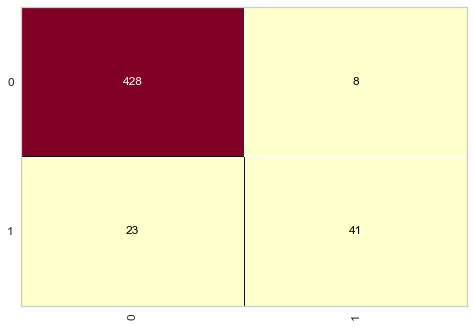

In [42]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [45]:
print(classification_report(y_credit_test, previsao))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

